In [17]:
using DrWatson
quickactivate(@__DIR__)

using NetHeider
using LinearAlgebra
using LightGraphs
using Plots
using DataFrames
using JLD2
using Statistics

In [18]:
res = jldopen(datadir("sims_add_unbalanced", "collected_results.jld2")) do file
    file["res"]
end
first(res, 10)

,inform_every,add_edges,m_filename,pr_neg,padd,measure_balance_every_step
,Float64?,#add_sin…?,String?,Float64?,Float64?,Int64?
1,0.25,add_single_edge2!,results.csv,0.05,0.01,10
2,0.25,add_single_edge2!,results.csv,0.0,0.01,10
3,0.25,add_single_edge2!,results.csv,0.15,0.01,10
4,0.25,add_single_edge2!,results.csv,0.1,0.01,10
5,0.25,add_single_edge2!,results.csv,0.25,0.01,10
6,0.25,add_single_edge2!,results.csv,0.2,0.01,10
7,0.25,add_single_edge2!,results.csv,0.3,0.01,10
8,0.25,add_single_edge2!,results.csv,0.05,0.01,10
9,0.25,add_single_edge2!,results.csv,0.0,0.01,10


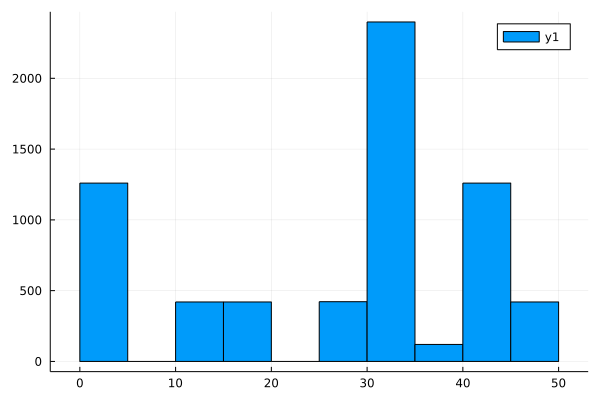

In [19]:
res.bal2bal_mean[100]
res.bu_mean[15][1,1,:]
sum(res.bu_mean[15][1,1,:])
# res.bal_unbal_table[1000][1,:,1,1]

histogram([sum(res.bu_mean[i][1,1,:]) for i in 1:nrow(res)])

In [20]:
names(res)[24:end]

11-element Vector{String}:
 "date"
 "links_num"
 "threshold"
 "bu_mean"
 "triads_num"
 "last_val"
 "unbal2bal_mean"
 "attr"
 "pn"
 "save_after"
 "path"

In [21]:
res[:, :triads_num][1]

10×100 Matrix{Int64}:
 42  42  41  41  41  41  41  41  40  …  16  16  16  16  16  16  16  16  16
 42  39  39  39  39  39  39  36  36     18  18  18  18  18  18  18  18  18
 45  45  45  45  44  44  44  44  41     20  20  20  20  20  20  20  20  20
 45  37  37  34  32  32  32  30  28     12  12  12  12  12  12  12  12  12
 45  43  41  41  41  41  41  41  41     15  15  15  15  15  15  15  15  15
 45  43  42  41  38  38  36  32  32  …  18  18  18  18  18  18  18  18  18
 45  45  41  41  41  38  36  36  36     16  16  16  16  16  16  16  16  16
 45  45  41  41  39  38  38  38  38     12  12  12  12  12  12  12  12  12
 43  43  43  38  38  38  38  38  38     13  13  13  13  13  13  13  13  13
 45  42  42  41  41  40  40  39  38     15  15  15  15  15  15  15  15  15

In [22]:
unique(res.padd)

5-element Vector{Union{Missing, Float64}}:
 0.01
 0.05
 0.09
 0.13
 0.17

In [23]:
# parameters
pn = 0.6
pclose_triad = 0.35
pr_pos = pr_neg = 0.05
padd = 0.09
threshold = [0:15...]/16

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

display(nrow(cropped_res))

16

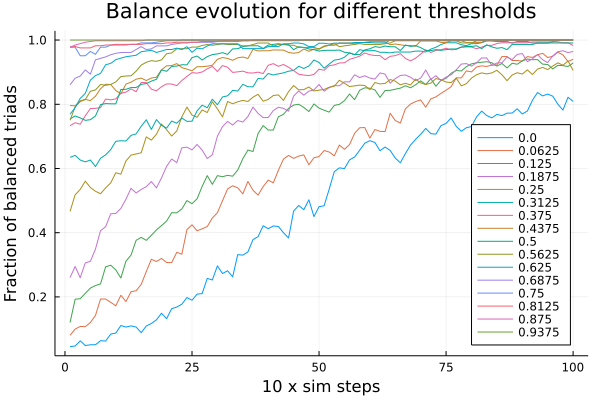

In [24]:
#balanced_mean

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :balanced_mean], label = string(th))
end
plot!()
xlabel!("10 x sim steps")
ylabel!("Fraction of balanced triads")
title!("Balance evolution for different thresholds")

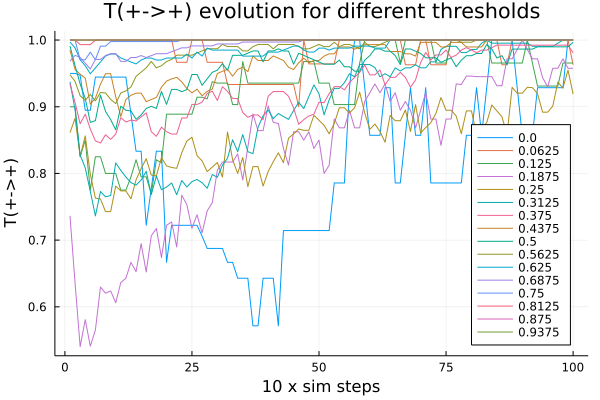

In [25]:
#bal2bal_mean, time evol

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
end
plot!()
xlabel!("10 x sim steps")
ylabel!("T(+->+)")
title!("T(+->+) evolution for different thresholds")

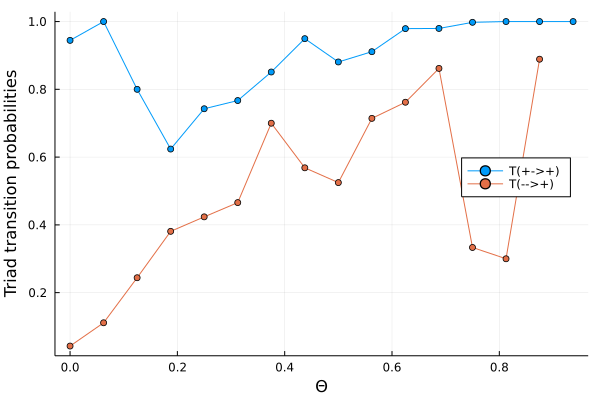

In [26]:
#bal2bal_mean, specific time

time_steps = 90
time_ind = Int(time_steps / 10)

xvals = cropped_res[:, :threshold]
yvals1 = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
plot(xvals, yvals1, markershape = :circle, label = "T(+->+)", legend = :right)#, linestyle = :none)

yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Triad transition probabilities")
# title!("T(+->+) evolution for different thresholds")

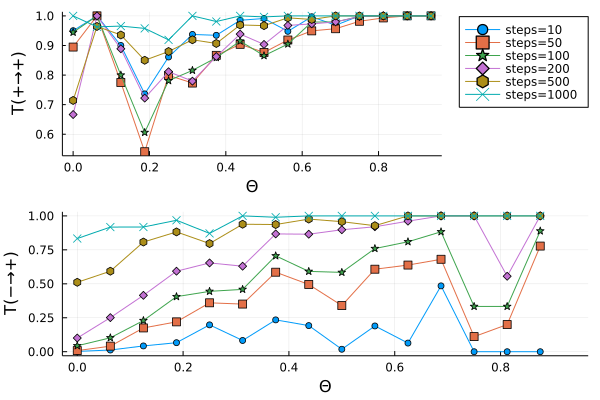

In [27]:
#bal2bal_mean, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 50, 100, 200, 500, 1000] 
time_inds = Int.(time_stepss / 10)

p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)
ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)

    yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)
end
plot(p1, p2, layout = (2,1))
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

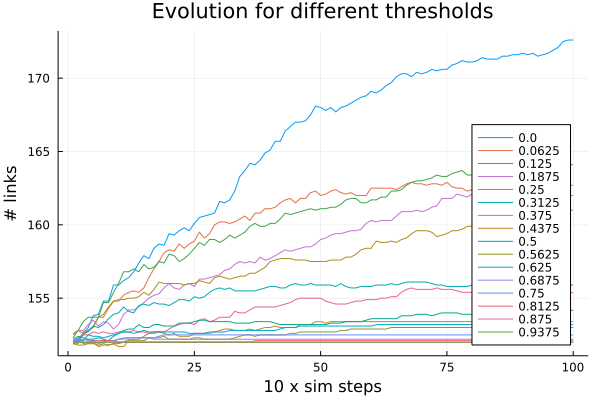

In [28]:
#links_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]

    vals = cropped_res[ind, :links_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("10 x sim steps")
ylabel!("# links")
title!("Evolution for different thresholds")

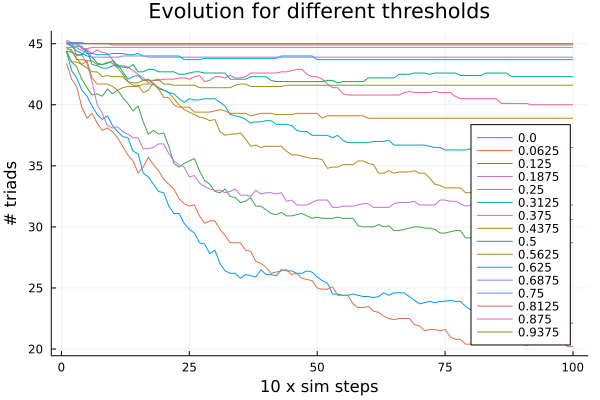

In [29]:
#triads_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    vals = cropped_res[ind, :triads_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("10 x sim steps")
ylabel!("# triads")
title!("Evolution for different thresholds")

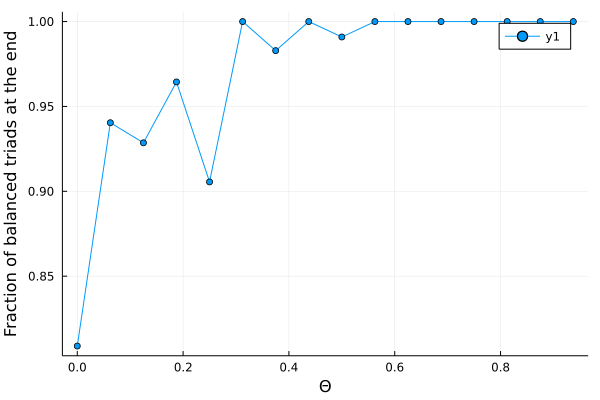

In [30]:
#last_val, specific time

# time_steps = 90
# time_ind = Int(time_steps / 10)

xvals = cropped_res[:, :threshold]
yvals1 = cropped_res[:, :last_val]
plot(xvals, yvals1, markershape = :circle)#, linestyle = :none)

# yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

# plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Fraction of balanced triads at the end")
# title!("T(+->+) evolution for different thresholds")

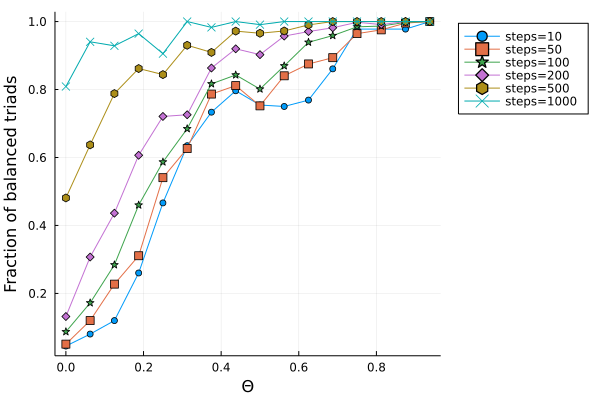

In [31]:
#balanced fraction, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 50, 100, 200, 500, 1000] 
time_inds = Int.(time_stepss / 10)

p1 = plot(legend = :outertopright)
ylabel!("Fraction of balanced triads")
# p2 = plot(legend = false)
# ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :balanced_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)

    # yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    # plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)
end
# plot(p1, p2, layout = (2,1))
plot(p1)
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

In [32]:
include(projectdir("scripts", "notebook_res_anal_funs.jl"))

┌ Warning: Module Plots with build ID 45621112424222 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module StatsBase with build ID 45513744527970 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module ChainRulesCore with build ID 462863344705557 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae2dbcce4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module ChainRulesCore with build ID 462863344705557 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae2dbcce4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module ChainRulesCore with build ID 462863344705557 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae2dbcce4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module StatsBase with build ID 45513744527970 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module ChainRulesCore with build ID 462863344705557 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae2dbcce4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module StatsBase with build ID 45513744527970 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module ChainRulesCore with build ID 462863344705557 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae2dbcce4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module StatsBase with build ID 45513744527970 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


┌ Warning: Module AbstractFFTs with build ID 75396067475588 is missing from the cache.
│ This may mean AbstractFFTs [621f4979-c628-5d54-868e-fcf4e3e8185c] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030


plot_dict (generic function with 1 method)

# Finding best simulation parameters

In [33]:
# Finding best simulation parameters
real_trans_df = jldopen(datadir("exp_pro", "real_randomized_triad_trans_results.jld2")) do file
    file["res"]
end
first(real_trans_df, 10)

,threshold,netsense_b2b,netsense_u2b,node_rand_b2b,node_rand_u2b,node_rand_b2b_std
,Float64,Any,Any,Any,Any,Any
1,0.0,0.4,0.0175439,0.2,0.00258333,0.18041
2,0.0625,0.2,0.0769231,0.374167,0.0163158,0.164333
3,0.125,0.631579,0.209302,0.486538,0.0582,0.11894
4,0.1875,0.612903,0.451613,0.560926,0.120694,0.0817351
5,0.25,0.794872,0.391304,0.696765,0.224655,0.0609315
6,0.3125,0.731707,0.619048,0.752222,0.332889,0.0561586
7,0.375,0.837209,0.736842,0.776813,0.406,0.0481336
8,0.4375,0.891304,0.375,0.817742,0.371515,0.0432376
9,0.5,0.869565,0.625,0.816774,0.400303,0.0430357


In [35]:
fname = datadir("exp_pro", "sim_add_unbalanced_compared_to_rl.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

true

In [36]:
# parameters
pn = unique(res.pn)
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [40, 50, 90, 130, 140, 180, 270]
time_inds = Int.(time_points ./ 10)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            
            append!(results_df, temp_df)
        end
    end


    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

,padd,pr_neg,pn,pclose_triad,pr_pos,dict_ind,time_ind,mse,mae
,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,0.01,0.05,0.0,0.0,0.05,1,4.0,2.77016,5.69722
2,0.01,0.05,0.0,0.0,0.05,1,5.0,2.73054,5.49675
3,0.01,0.05,0.0,0.0,0.05,1,9.0,2.27347,4.70665
4,0.01,0.05,0.0,0.0,0.05,1,13.0,1.72495,4.49441
5,0.01,0.05,0.0,0.0,0.05,1,14.0,1.81922,4.61368
6,0.01,0.05,0.0,0.0,0.05,1,18.0,2.0507,4.93388
7,0.01,0.05,0.0,0.0,0.05,1,27.0,2.20822,5.94509
8,0.05,0.05,0.0,0.0,0.05,2,4.0,3.08787,6.21681
9,0.05,0.05,0.0,0.0,0.05,2,5.0,2.21899,5.12138


"Extracted 16 rows."

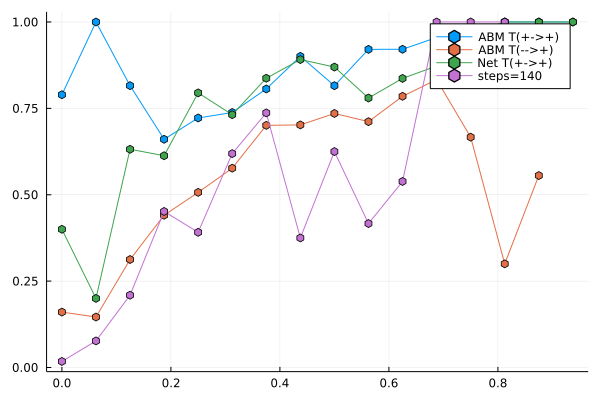

In [37]:
dict = dicts[1]
cropped_res = get_part_dataframe(res, dict)

i = 5
time_ind = Int(time_inds[5])
xvals = cropped_res[:, :threshold]
b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

plot(xvals, b2b_vals, markershape = markers[i], label = "ABM T(+->+)")#, linestyle = :none)
plot!(xvals, u2b_vals, markershape = markers[i], label = "ABM T(-->+)")#, linestyle = :none)
plot!(real_trans_df.threshold, real_trans_df.netsense_b2b, markershape = markers[i], label = "Net T(+->+)")#, linestyle = :none)
plot!(real_trans_df.threshold, real_trans_df.netsense_u2b, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)


In [43]:
cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
inds = zeros(Int, length(cols))
for (i, col) in enumerate(cols)
    inds2 = findall(results_df[:, col] .== minimum(results_df[:, col]))
    if length(inds2) > 1
        display(inds2)
    end
    inds[i] = inds2[1]
end
inds

4-element Vector{Int64}:
 665
 665
 665
 665

"Extracted 16 rows."

"Dict(\"padd\" => 0.17, \"pr_neg\" => 0.0, \"pn\" => 0.0, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.0)"

"Extracted 16 rows."

"Dict(\"padd\" => 0.13, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"Extracted 16 rows."

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.1, \"pn\" => 0.0, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.1)"

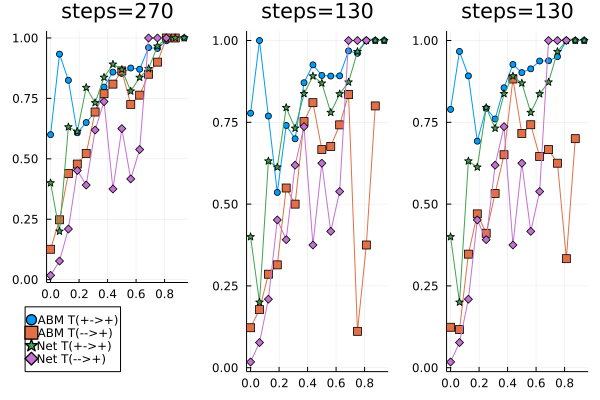

In [39]:
p1 = plot_dict(dicts, results_df, 665)
# title!(p1, string(dicts[results_df[665, :dict_ind]]))
display(string(dicts[results_df[665, :dict_ind]]))
p2 = plot_dict(dicts, results_df, 60)
display(string(dicts[results_df[60, :dict_ind]]))
# title!(p1, dicts[results_df[665, :dict_ind]])
p3 = plot_dict(dicts, results_df, 1481)
display(string(dicts[results_df[1481, :dict_ind]]))
# title!(p1, dicts[results_df[665, :dict_ind]])

plot!(p1, legend = :outertopright)
plot!(p1, legend = :outerbottom)
plot!(p2, legend = false)
plot!(p3, legend = false)

plot(p1, p2, p3, layout = (1,3))

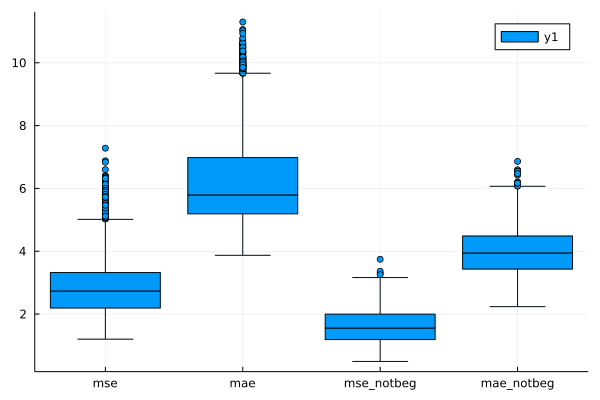

In [40]:
L = length(results_df.mse)
xvals = reduce(vcat, [repeat([i],L) for i in 1:4])
fields = [:mse, :mae, :mse_notbeg, :mae_notbeg]
yvals = reduce(vcat, [results_df[:,field] for field in fields])

boxplot(xvals, yvals, xticks = ([1, 2, 3, 4], fields))
# xticks!(["d", "e", "t"])
plot!()

In [41]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


4×10 Matrix{Int64}:
 665  734   732   237   473  733  474   658  503  291
 665  753   734   732   473  264  503   662  237  474
 665  503  2364   672  1497  291  753  1153  473  474
 665  753   503  1642   557  558  754   658  489  556

In [42]:
valinds

4×10 Matrix{Float64}:
 1.20051   1.22022   1.3269    1.32948   …  1.40487  1.4318    1.43967
 3.87162   4.01775   4.03757   4.08021      4.14157  4.1426    4.17021
 0.491738  0.533277  0.576098  0.594219     0.60857  0.609254  0.616024
 2.23641   2.29143   2.31685   2.44078      2.56606  2.5794    2.58798

In [44]:
display(string(dicts[results_df[753, :dict_ind]]))
display(string(results_df[753, :time_ind]*10))
display(string(dicts[results_df[503, :dict_ind]]))
display(string(results_df[503, :time_ind]*10))

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.0, \"pn\" => 0.6, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.0)"

"130.0"

"Dict(\"padd\" => 0.05, \"pr_neg\" => 0.0, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.0)"

"180.0"

To summarize. 

Overall the best results were obtained with the following parameters:

* Dict(\"padd\" => 0.17, \"pr_neg\" => 0.0, \"pn\" => 0.0, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.0), time = 270

There was no other result comparable, or slightly worse. The 2nd best results are:

* Dict(\"padd\" => 0.09, \"pr_neg\" => 0.0, \"pn\" => 0.6, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.0), time = 130
* Dict(\"padd\" => 0.05, \"pr_neg\" => 0.0, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.0), time = 180.0


Obtained error results are comparable to the results of the model with links being add constantly